翻译 https://www.kaggle.com/arthurtok/interactive-porto-insights-a-plot-ly-tutorial

# Introduction
This competition is hosted by the third largest insurance company in Brazil: Porto Seguro with the task of predicting the probability that a driver will initiate an insurance claim in the next year.

* 比赛由巴西第三大保险公司PS主办。
* 比赛任务是预测司机在来年**理赔（initiate an insurance claim）**的概率。


This notebook will aim to provide some interactive charts and analysis of the competition data by way of the Python visualisation library Plot.ly and hopefully bring some insights and beautiful plots that others can take and replicate. Plot.ly is one of the main products offered by the software company - Plotly which specializes in providing online graphical and statistical visualisations (charts and dashboards) as well as providing an API to a whole rich suite of programming languages and tools such as Python, R, Matlab, Node.js etc.

* 本笔记旨在提供比赛数据分析的交互式图表。
* Python可视化库Plot.ly。


Listed below for easy convenience are links to the various Plotly plots in this notebook:
* 列举本笔记中图表类型。

* **水平柱状图(Simple horizontal bar plot)** -观察变量分布 Used to inspect the Target variable distribution
* **相关性热力图(Correlation Heatmap plot)** -观察两个变量间相关性 Inspect the correlation between the different features
* **散点图(Scatter plot)** -对比特征重要性，随机森林和梯度提升模型 Compare the feature importances generated by Random Forest and Gradient-Boosted model
* **垂直柱状图(Vertical bar plot)** -降序列举变量重要性 List in Descending order, the importance of the various features
* **3D散点图(3D Scatter plot)**

The themes in this notebook can be briefly summarized follows:

1. **数据质量检查(Data Quality Checks)** -缺失值分析 Visualising and evaluating all missing/Null values (values that are -1)
2. **特征检查和过滤(Feature inspection and filtering)** -分析和目标变量的相关性 Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables.
3. **特征重要性排序(Feature importance ranking via learning models)** - Building a Random Forest and Gradient Boosted model to help us rank features based off the learning process.

In [3]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

In [5]:
#　Let us load in the training data provided using Pandas:

train = pd.read_csv("../data/train.csv")
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [8]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0]
columns = train.shape[1]
print("The train dataset contains {0} rows and {1} columns".format(rows, columns))

The train dataset contains 595212 rows and 59 columns


# Data Quality checks
Null or missing values check
* 缺失值检查

As part of our quality checks, let us quick look at whether there are any null values in the train dataset as follows:
* 查看训练数据中是否有空值。

In [9]:
# any() applied twice to check run the isnull check across all columns.
train.isnull().any().any()

False

Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as "Values of -1 indicate that the feature was missing from the observation". Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.
* 训练集没有空值，并不意味着数据缺失值检查已经完成了。
* 因为数据说明中有“-1表示数据缺失”。
* 可以认为PS公司简单的做了空值替换，把数据中的空值都替换成-1。
* 现在查看数据缺失情况。

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:
* 首先，把-1替换成空值。

In [10]:
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)

Next, we can use resident Kaggler's Aleksey Bilogur - creator of the "Missingno" package which is a most useful and convenient tool in visualising missing values in the dataset, so check it out.
* 接着，用missingno模块进行缺失值分析。

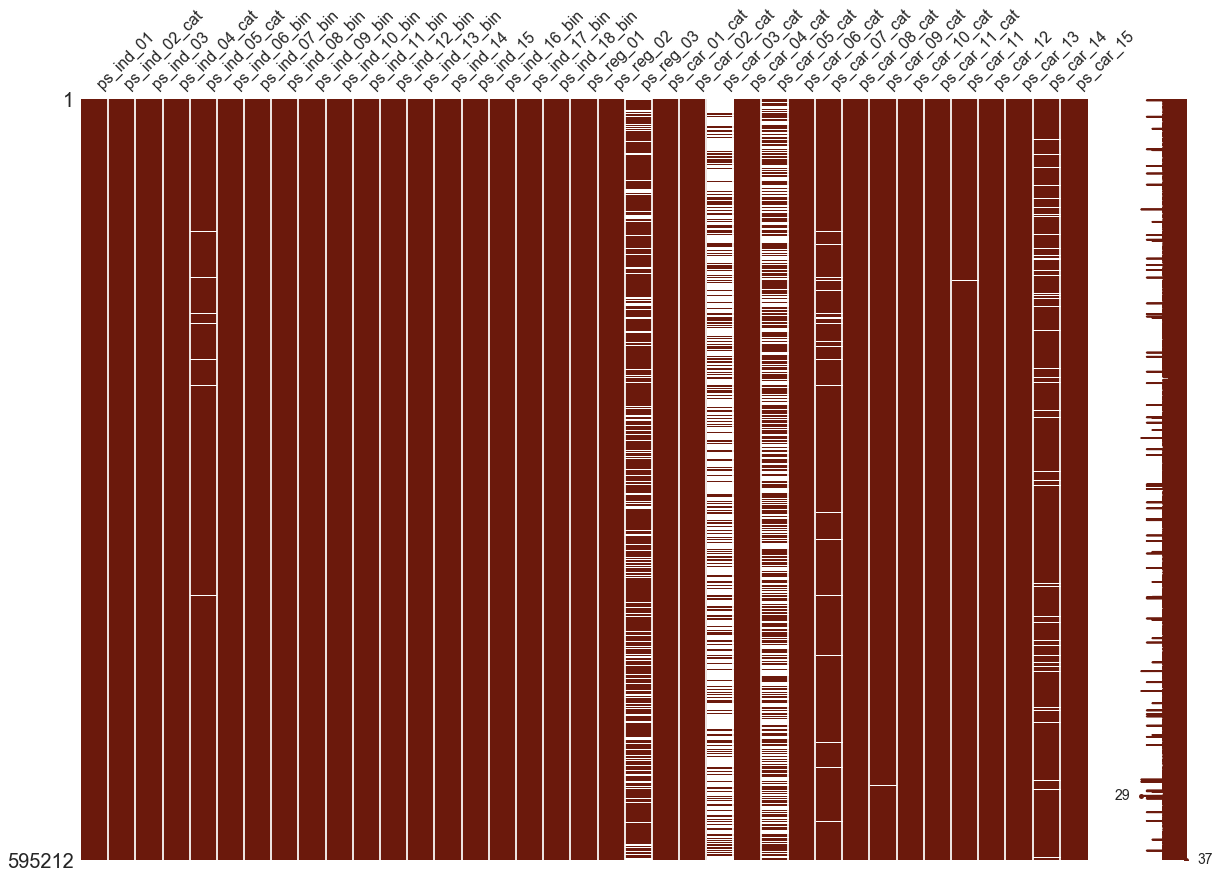

In [13]:
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

As we can see, the missing values now become much more apparent and clear when we visualise it, where the empty white bands (data that is missing) superposed on the vertical dark red bands (non-missing data) reflect the nullity of the data in that particular column. In this instance, we can observe that there are 7 features out of the 59 total features (although as rightly pointed out by Justin Nafe in the comments section there are really a grand total of 13 columns with missing values) that actually contained null values. This is due to the fact that the missingno matrix plot can only comfortable fit in approximately 40 odd features to one plot after which some columns may be excluded, and hence the remaining 5 null columns have been excluded. To visualize all nulls, try changing the figsize argument as well as tweaking how we slice the dataframe.

* 可视化之后，缺失值就变明显了。
* 一列是一个变量，红色部分是非缺失值，空白是缺失值。
* 上图绘制了59个特征中，有7个包含缺失值的（Justin Nafe已经指出共有13个包含缺失值的特征）。
* 因为missingno只适合一次性显示40余个。
* 试着调整figsize和dataframe的切分方式。



For the 7 null columns that we are able to observe, they are hence listed here as follows:
* 7个包含缺失值的变量如下：

**ps\_ind\_05\_cat | ps\_reg\_03 | ps\_car\_03\_cat | ps\_car\_05\_cat | ps\_car\_07\_cat | ps\_car\_09\_cat | ps\_car\_14**

Most of the missing values occur in the columns suffixed with \_cat. One should really take further note of the columns ps\_reg\_03, ps\_car\_03\_cat and ps\_car\_05\_cat. Evinced from the ratio of white to dark bands, it is very apparent that a big majority of values are missing from these 3 columns, and therefore a blanket replacement of -1 for the nulls might not be a very good strategy.

* 大部分缺失值出现在命名为\_cat的变量中。
* ps\_reg\_03、ps\_car\_03\_cat和ps\_car\_05\_cat值得额外注意。
* 看这空白率，显然这3个变量大量数值缺失，因此直接将空值替换为-1不是个好主意。



## Target variable inspection

Another standard check normally conducted on the data is with regards to our target variable, where in this case, the column is conveniently titled "target". The target value also comes by the moniker of class/label/correct answer and is used in supervised learning models along with the corresponding data that is given (in our case all our train data except the id column) to learn the function that best maps the data to our target in the hope that this learned function can generalize and predict well with new unseen data.

* 检查目标变量是另一项例行检查，这里目标变量就叫target。

In [23]:
data = [
    go.Bar(
        x = train["target"].value_counts().index.values,
        y = train["target"].value_counts().values,
        text='Distribution of target variable'
    )
]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

Hmmn, the target variable is rather imbalanced so it might be something to keep in mind. An imbalanced target will prove quite
* 目标变量极其非均衡。

## Datatype check

This check is carried out to see what kind of datatypes the train set is comprised of : integers or characters or floats just to gain a better overview of the data we were provided with. One trick to obtain counts of the unique types in a python sequence is to use the Counter method, when you import the Collections module as follows:
* 此项检查查看数据类型，整形、字符、浮点数。
* 一个技巧是使用**Counter方法**。

In [18]:
Counter(train.dtypes.values)

Counter({dtype('int64'): 49, dtype('float64'): 10})

As alluded to above, there are a total of 59 columns that make up the train dataset and as we can observe from this check, the features/columns consist of only two datatypes - Integer and floats.
* 变量只有两种类型组成，整形和浮点型。

Another point to note is that Porto Seguro has actually provided us data with headers that come suffixed with abbreviations such as "\_bin", "\_cat" and "\_reg", where they have given us a rough explanation that \_bin indicates binary features while \_cat indicates categorical features whilst the rest are either continuous or ordinal features. Here I shall simplify this a bit further just by looking at float values (probably only the continuous features) and integer datatypes (binary, categorical and ordinal features).
* PS公司提供的变量名的下标表示数据类型。
* \_bin 二值；\_cat 离散；\_reg 连续型？
* 在这个分析中将其简化为二类：
    * 连续型
    * 整形（二值、类别、排序）

In [20]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

# Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"
* 简单看看特征间的线性关系。
* 用**seaborn模块**的heatmap来看相关性热力图。
* **pandas模块**的dataframe有**corr()**方法，可以计算变量间Pearson系数。

## Correlation of float features

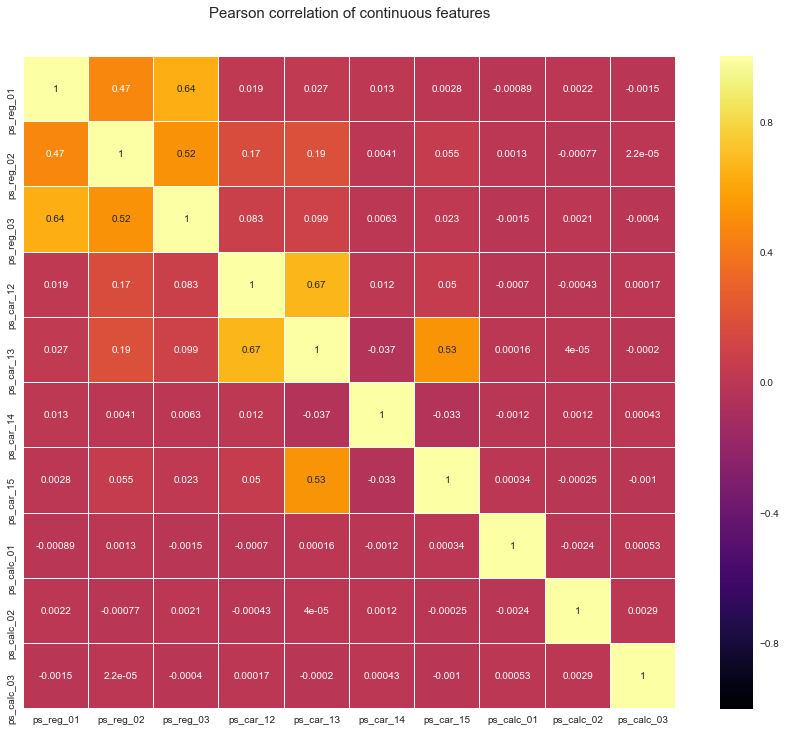

In [21]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the features that display a somewhat substantial positive correlation are listed as follows:

* 大部分特征间没相关性。
* 其中四组特征两两间有正相关。


1. **(ps_reg_01, ps_reg_03)**
2. **(ps_reg_02, ps_reg_03)**
3. **(ps_car_12, ps_car_13)**
4. **(ps_car_13, ps_car_15)**


## Correlation of integer features

For the columns of interger datatype, I shall now switch to using the Plotly library to show how one can also generate a heatmap of correlation values interactively. Much like our earlier Plotly plot, we generate a heatmap object by simply invoking the "go.Heatmap". Here we have to provide values to three different axes, where x and y axes take in the column names while the correlation value is provided by the z-axis. The colorscale attribute takes in keywords that correspond to different color palettes that you will see in the heatmap where in this example, I have used the Greys colorscale (others include Portland and Viridis - try it for yourself).

* 整形的相关性用**Plotly模块**分析，此模块也可以画相关性热力图。
* 用**go.Heatmap**画。
    * x轴，y轴，变量名
    * z轴，相关性
    * colorscale属性，heatmap的颜色

In [24]:
#train_int = train_int.drop(["id", "target"], axis=1)
# colormap = plt.cm.bone
# plt.figure(figsize=(21,16))
# plt.title('Pearson correlation of categorical features', y=1.05, size=15)
# sns.heatmap(train_cat.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=False)
data = [
    go.Heatmap(
        z= train_int.corr().values,
        x=train_int.columns.values,
        y=train_int.columns.values,
        colorscale='Viridis',
        reversescale=False,
        text=True ,
        opacity=1.0
    )
]

layout = go.Layout(
    title='Pearson Correlation of Integer-type features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

Similarly, we can observe that there are a huge number of columns that are not linearly correlated with each other at all, evident from the fact that we observe quite a lot of 0 value cells in our correlation plot. This is quite a useful observation to us, especially if we are trying to perform dimensionality reduction transformations such as Principal Component Analysis (PCA), this would require a certain degree of correlation . We can note some features of interest are as follows:

* 类似的，大量变量间没有线性相关性，还有很多0。
* 这个信息很有用，尤其是采用降维技术时。


Negatively correlated features : ps\_ind\_06\_bin, ps\_ind\_07\_bin, ps\_ind\_08\_bin, ps\_ind\_09\_bin

* 负相关的变量。


One interesting aspect to note is that in our earlier analysis on nullity, ps\_car\_03\_cat and ps\_car\_05\_cat were found to contain many missing or null values. Therefore it should come as no surprise that both these features show quite a strong positive linear correlation to each other on this basis, albeit one that may not really reflect the underlying truth for the data.

* 值得注意的是，在先前的缺失值分析中发现，ps\_car\_03\_cat和ps\_car\_05\_cat包含很多空值。
* 这种缺失导致了相互之间的正相关。


## Mutual Information plots

Mutual information is another useful tool as it allows one to inspect the mutual information between the target variable and the corresponding feature it is calculated against. For classification problems, we can conveniently call Sklearn's mutual\_info\_classif method which measures the dependency between two random variables and ranges from zero (where the random variables are independent of each other) to higher values (indicate some dependency). This therefore will help give us an idea of how much information from the target may be contained within the features.

* **互信息(Mutual information)**是另一种分析特征和目标变量间关系的方法。
* 在**分类问题**中，可以方便的使用**sklearn模块**的**mutual\_info\_classif方法**计算。
* 这种分析可以知悉特征中包含多少关于目标变量的信息。


The sklearn implementation of the mutual\_info\_classif function tells us that it "relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances", where you can go into more detail on the official sklearn page in the link here.

* **sklearn模块**中**mutual\_info\_classif方法**的实现说明：“依赖非参数方法，基于k近邻的熵估计”

In [26]:
mf = mutual_info_classif(train_float.values,train.target.values,n_neighbors=3, random_state=17)
print(mf)

[ 0.01402035  0.00431986  0.0055185   0.00778454  0.00157233  0.00197537
  0.01226     0.00553038  0.00545101  0.00562139]


## Binary features inspection

Another aspect of the data that we may want to inspect would be the columns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly barplot of these binary values as follows:

* 分析二值数据
* 直接画垂直柱状图

In [30]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())

In [32]:
trace1 = go.Bar(
    x=bin_col,
    y=zero_list ,
    name='Zero count'
)
trace2 = go.Bar(
    x=bin_col,
    y=one_list,
    name='One count'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    title='Count of 1 and 0 in binary variables'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

Here we observe that there are 4 features : ps\_ind\_10\_bin, ps\_ind\_11\_bin, ps\_ind\_12\_bin, ps\_ind\_13\_bin which are completely dominated by zeros. This begs the question of whether these features are useful at all as they do not contain much information about the other class vis-a-vis the target.

* 我们观察到ps\_ind\_10\_bin, ps\_ind\_11\_bin, ps\_ind\_12\_bin, ps\_ind\_13\_bin四个特征完全由0主导。
* 这些特征是否完全无效？


## Categorical and Ordinal feature inspection

Let us first take a look at the features that are termed categorical as per their suffix "\_cat".

* 首先看看下标为"\_cat"的特征。

# Feature importance via Random Forest

Let us now implement a Random Forest model where we fit the training data with a Random Forest Classifier and look at the ranking of the features after the model has finished training. This is a quick way of using an ensemble model (ensemble of weak decision tree learners applied under Bootstrap aggregated) which does not require much parameter tuning in obtaining useful feature importances and is also pretty robust to target imbalances. We call the Random Forest as follows:

* 现在，实现一个随机森林模型，用来给特征排序。
* 这是使用集成模型的一种快速方法。

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(train.drop(['id', 'target'],axis=1), train.target)
features = train.drop(['id', 'target'],axis=1).columns.values
print("----- Training Done -----")

----- Training Done -----


## Plot.ly Scatter Plot of feature importances

Having trained the Random Forest, we can obtain the list of feature importances by invoking the attribute "feature\_importances" and plot our next Plotly plot, the Scatter plot.

* 训练了随机森林，可以通过**feature\_importances属性**获得特征重要性。
* 用散点图画。


Here we invoke the command Scatter and as per the previous Plotly plots, we have to define our y and x-axes. However the one thing that we pay attention to in scatter plots is the marker attribute. It is the marker attribute where we define and hence control the size, color and scale of the scatter points embedded.

* 用**go.Scatter**类
* 绘图：
    * x轴，属性
    * y轴，特征重要性
    * marker属性可以用一个dict对象设置，大小、颜色、形状等

In [48]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
        ticklen= 5,
        showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [56]:
# Scatter plot 
feature_with_importance = list(reversed(sorted(zip(rf.feature_importances_, features))))
feature_name = [x[1] for x in feature_with_importance]
feature_imp = [x[0] for x in feature_with_importance]


trace = go.Scatter(
    y = feature_imp,
    x = feature_name,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = [imp * 500 for imp in feature_imp],
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_imp,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_name
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
        ticklen= 5,
        showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

Furthermore we could also display a sorted list of all the features ranked by order of their importance, from highest to lowest via the same plotly barplots as follows:

* 可以再画个柱状图。

In [61]:
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), reverse = False)))

trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
    width = 900, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.iplot(fig1, filename='plots')

## Decision Tree visualisation

One other interesting trick or technique oft used would be to visualize the tree branches or decisions made by the model. For simplicity, I fit a decision tree (of max\_depth = 3) and hence you only see 3 levels in the decision branch, use the export to graph visualization attribute in sklearn "export\_graphviz" and then export and import the tree image for visualization in this notebook.

* 可视化决策树是另一个常用手法。
* 为了方便，拟合一个3层的决策树。
* 用**sklearn模块**的**export\_graphviz方法**在notebook中绘图。

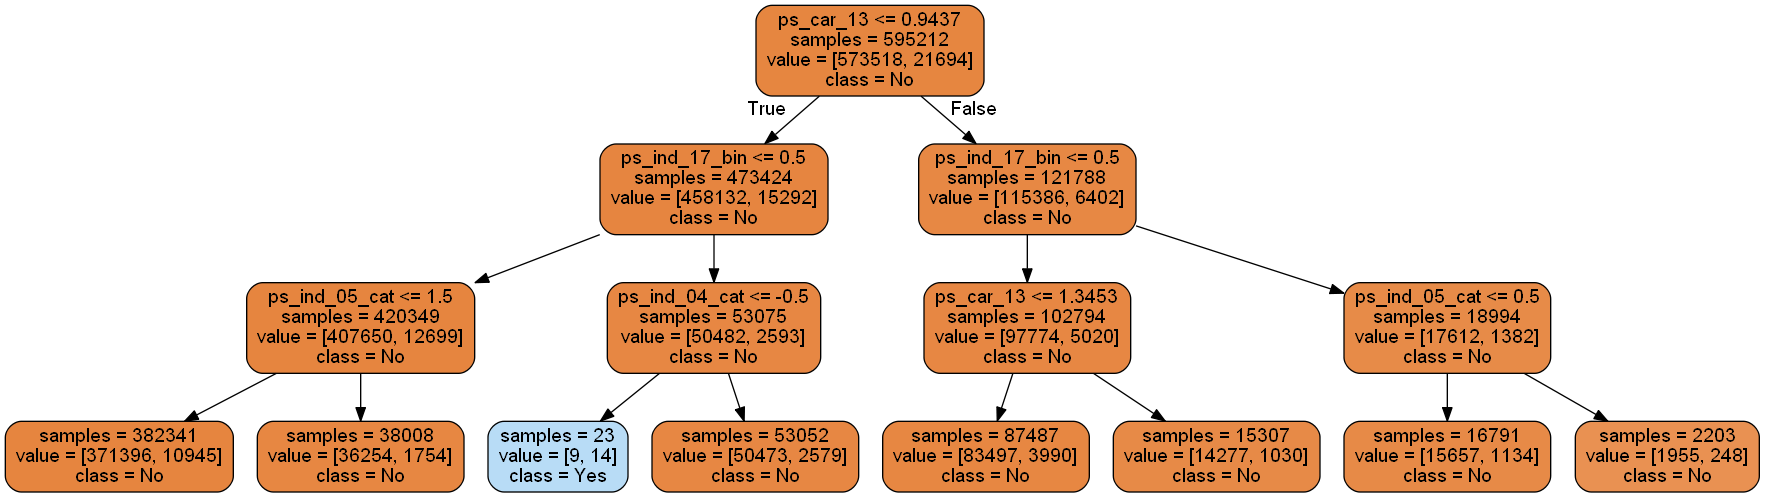

In [62]:
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(train.drop(['id', 'target'],axis=1), train.target)

# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = train.drop(['id', 'target'],axis=1).columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])

# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png",)